# Teaching Word Embeddings and Word2Vec

Welcome! This notebook is designed as a comprehensive teaching aid for introducing word embeddings and the Word2Vec algorithm to an NLP class. Feel free to run the code cells and modify the examples to fit your lesson plan.

## Learning Objectives

By the end of this lesson, students should be able to:

1. Explain what word embeddings are and why they are useful.
2. Understand the difference between one-hot encodings and dense embeddings.
3. Describe the intuition behind the Word2Vec algorithm (CBOW and Skip-Gram).
4. Train a Word2Vec model on a small corpus using `gensim`.
5. Evaluate embeddings through similarity queries and analogies.

## 1. Introduction to Word Embeddings

Word embeddings map words to vectors of real numbers so that semantic relationships in language correspond to geometric relationships in vector space. Unlike sparse one-hot vectors, embeddings are dense and capture similarity: words that appear in similar contexts obtain similar vectors.

Classic embedding models include:

- **Word2Vec**: Predicts a target word from surrounding context (CBOW) or context words from a target word (Skip-Gram).
- **GloVe**: Learns embeddings from global co-occurrence statistics.
- **FastText**: Extends Word2Vec with subword information, improving representations for rare or morphologically rich words.

### Discussion Prompt

*Ask students:* Why might one-hot vectors be insufficient for capturing semantic similarity between words?

## 2. Preparing the Environment

The following imports use the `gensim` library to train a Word2Vec model. If `gensim` is not installed in your environment, install it with `pip install gensim`.

We also use `nltk` for tokenization, though you can swap in your preferred tokenizer.

In [1]:
# Uncomment the line below if you need to install gensim or nltk in a new environment
# !pip install gensim nltk

In [2]:
import itertools
from collections import Counter

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

import nltk
from nltk.corpus import stopwords
from nltk import download

# Download the stopwords corpus if it is not already present
download('stopwords', quiet=True)

True

### Teaching Tip

Explain how libraries like `gensim` abstract away the heavy numerical optimization, letting practitioners focus on the data and evaluation of embeddings.

## 3. Building a Toy Corpus

For classroom demonstrations, a small, thematic corpus keeps the training time short. Below we build a mini-corpus about travel and food. Encourage students to augment the corpus with their own sentences and observe how the embeddings change.

In [3]:
raw_corpus = [
    "Travelers love exploring new cities and tasting local cuisine.",
    "The chef prepared a traditional meal with fresh ingredients.",
    "Adventurers hike mountains and navigate forests during their trips.",
    "Cafes often serve pastries alongside aromatic coffee.",
    "Guides recommend hidden restaurants that locals adore.",
    "Tourists photograph landmarks and share stories online.",
    "Families plan vacations to relax and enjoy cultural experiences.",
    "Street food stalls offer quick bites packed with flavor.",
    "Cyclists explore scenic routes and discover quaint villages.",
    "Cooking classes teach travelers to prepare authentic dishes."
]

for sentence in raw_corpus:
    print(sentence)

Travelers love exploring new cities and tasting local cuisine.
The chef prepared a traditional meal with fresh ingredients.
Adventurers hike mountains and navigate forests during their trips.
Cafes often serve pastries alongside aromatic coffee.
Guides recommend hidden restaurants that locals adore.
Tourists photograph landmarks and share stories online.
Families plan vacations to relax and enjoy cultural experiences.
Street food stalls offer quick bites packed with flavor.
Cyclists explore scenic routes and discover quaint villages.
Cooking classes teach travelers to prepare authentic dishes.


### Classroom Exercise

Invite students to:

1. Extend the corpus with domain-specific sentences (e.g., technology, sports).
2. Predict which words will end up near each other in embedding space and justify their reasoning.

## 4. Preprocessing the Corpus

We lower-case and tokenize the sentences, remove stop words to focus on informative tokens, and inspect the vocabulary size. Use this section to discuss trade-offs in preprocessing (e.g., removing vs. keeping stop words, stemming vs. lemmatization).

In [4]:
stop_words = set(stopwords.words('english'))

processed_corpus = []
for sentence in raw_corpus:
    tokens = [token for token in simple_preprocess(sentence) if token not in stop_words]
    processed_corpus.append(tokens)

print(processed_corpus)

[['travelers', 'love', 'exploring', 'new', 'cities', 'tasting', 'local', 'cuisine'], ['chef', 'prepared', 'traditional', 'meal', 'fresh', 'ingredients'], ['adventurers', 'hike', 'mountains', 'navigate', 'forests', 'trips'], ['cafes', 'often', 'serve', 'pastries', 'alongside', 'aromatic', 'coffee'], ['guides', 'recommend', 'hidden', 'restaurants', 'locals', 'adore'], ['tourists', 'photograph', 'landmarks', 'share', 'stories', 'online'], ['families', 'plan', 'vacations', 'relax', 'enjoy', 'cultural', 'experiences'], ['street', 'food', 'stalls', 'offer', 'quick', 'bites', 'packed', 'flavor'], ['cyclists', 'explore', 'scenic', 'routes', 'discover', 'quaint', 'villages'], ['cooking', 'classes', 'teach', 'travelers', 'prepare', 'authentic', 'dishes']]


In [5]:
flat_tokens = list(itertools.chain.from_iterable(processed_corpus))
vocab_counts = Counter(flat_tokens)

print(f"Vocabulary size: {len(vocab_counts)}")
print(vocab_counts.most_common(10))

Vocabulary size: 67
[('travelers', 2), ('love', 1), ('exploring', 1), ('new', 1), ('cities', 1), ('tasting', 1), ('local', 1), ('cuisine', 1), ('chef', 1), ('prepared', 1)]


### Discussion Prompt

*Ask students:* How might our choices in preprocessing affect the resulting embeddings?

## 5. Training a Word2Vec Model

We train a Skip-Gram model (set `sg=1`) on the toy corpus. Highlight the key hyperparameters:

- `vector_size`: dimensionality of embeddings
- `window`: size of the context window around each target word
- `min_count`: ignores words with total frequency lower than this value
- `workers`: number of worker threads (parallelism)
- `epochs`: number of training iterations over the corpus

In [6]:
embedding_size = 50
window_size = 4
min_word_frequency = 1
num_epochs = 200

model = Word2Vec(
    sentences=processed_corpus,
    vector_size=embedding_size,
    window=window_size,
    min_count=min_word_frequency,
    workers=1,
    sg=1,  # Skip-Gram architecture
    epochs=num_epochs,
    seed=42,
)

print(model)

Word2Vec<vocab=67, vector_size=50, alpha=0.025>


### Talking Points

- Discuss the intuition of Skip-Gram versus CBOW.
- Emphasize that larger corpora and more epochs lead to richer embeddings but require more compute.
- Mention negative sampling and hierarchical softmax as optimization techniques (both configurable in `gensim`).

## 6. Exploring the Learned Embeddings

After training, the model's `wv` attribute provides access to the embedding vectors and similarity methods. Encourage students to experiment with different words and observe semantic relationships.

In [7]:
word = 'travelers'
print(f"Embedding for '{word}':")
print(model.wv[word])

print(f"\nMost similar words to '{word}':")
for similar_word, score in model.wv.most_similar(word, topn=5):
    print(f"  {similar_word:12s} -> {score:.3f}")

Embedding for 'travelers':
[-0.00666086 -0.00034394  0.01197444 -0.00148477 -0.00042071  0.02153667
 -0.01651085  0.01625169 -0.01821971 -0.01724589  0.00230025  0.036213
 -0.0005885   0.02983014  0.01396206  0.00930048  0.00194633 -0.02438115
  0.00571404  0.00122413 -0.0131609  -0.01321233 -0.02189214  0.02458908
  0.0332509   0.00776717 -0.00350208  0.01166436 -0.00981802 -0.00101306
  0.00143696 -0.00942358 -0.02187194  0.00065338  0.01518632 -0.00826624
  0.01655426 -0.02083671 -0.02156644  0.0060365  -0.01810679  0.01153303
  0.0286448  -0.01541105 -0.00728817  0.01521701  0.01156632  0.03323188
  0.01443453 -0.00674019]

Most similar words to 'travelers':
  stalls       -> 0.575
  bites        -> 0.569
  restaurants  -> 0.568
  alongside    -> 0.559
  tourists     -> 0.551


In [8]:
# Explore relationships between culinary-related words
for query_word in ['chef', 'coffee', 'dishes', 'vacations']:
    print(f"\nMost similar words to '{query_word}':")
    for similar_word, score in model.wv.most_similar(query_word, topn=5):
        print(f"  {similar_word:12s} -> {score:.3f}")


Most similar words to 'chef':
  restaurants  -> 0.355
  travelers    -> 0.340
  stalls       -> 0.278
  prepare      -> 0.265
  pastries     -> 0.258

Most similar words to 'coffee':
  offer        -> 0.583
  cooking      -> 0.571
  alongside    -> 0.560
  vacations    -> 0.558
  classes      -> 0.556

Most similar words to 'dishes':
  explore      -> 0.607
  offer        -> 0.597
  flavor       -> 0.572
  prepare      -> 0.571
  packed       -> 0.534

Most similar words to 'vacations':
  stalls       -> 0.595
  coffee       -> 0.558
  routes       -> 0.558
  tourists     -> 0.556
  offer        -> 0.556


### Exercise: Analogy Queries

Word embeddings enable vector arithmetic to solve analogies. For example, "king - man + woman ≈ queen". With our small corpus, analogies may be rough, but the exercise illustrates the concept.

In [9]:
def analogy(model, positive_terms, negative_terms, topn=3):
    return model.wv.most_similar(positive=positive_terms, negative=negative_terms, topn=topn)

try:
    results = analogy(model, positive_terms=['coffee', 'chef'], negative_terms=['pastries'])
    for word, score in results:
        print(f"{word:12s} -> {score:.3f}")
except KeyError as exc:
    print(f"Missing word in vocabulary: {exc}")

restaurants  -> 0.420
alongside    -> 0.386
vacations    -> 0.357


## 7. Visualizing Embeddings with PCA

Dimensionality reduction helps visualize high-dimensional embeddings. We use Principal Component Analysis (PCA) to project vectors to 2D. Discuss other options like t-SNE or UMAP for richer corpora.

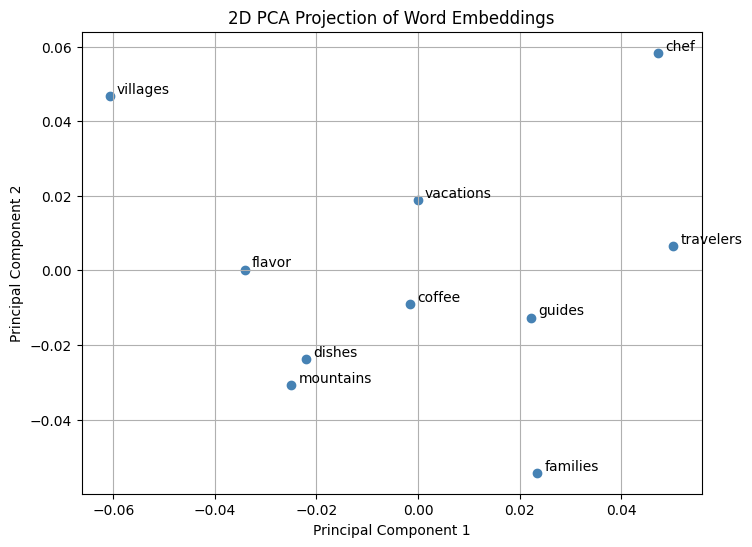

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words_to_visualize = ['travelers', 'chef', 'coffee', 'dishes', 'guides', 'families', 'villages', 'vacations', 'flavor', 'mountains']

vectors = [model.wv[word] for word in words_to_visualize]
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='steelblue')

for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), xytext=(5, 2), textcoords='offset points')

plt.title('2D PCA Projection of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Classroom Discussion

Ask students to interpret clusters or directions in the visualization. Which words group together? Why?

## 8. Extending the Lesson

Ideas for further exploration:

- Compare Skip-Gram with CBOW by setting `sg=0`.
- Experiment with different embedding sizes and window widths.
- Evaluate embeddings on tasks like word similarity benchmarks.
- Introduce subword information via FastText for handling rare words.
- Discuss contextual embeddings (e.g., BERT) as a successor to static embeddings.

## 9. Summary

- Word embeddings encode semantic information in dense vectors.
- Word2Vec learns embeddings by predicting context-target pairs.
- Preprocessing choices and hyperparameters significantly influence learned representations.
- Visualization and analogies help students intuitively grasp embedding spaces.

Encourage students to experiment with larger datasets and compare embeddings produced by different algorithms.